In [2]:
## load useful libraries
suppressWarnings(suppressPackageStartupMessages(library(rhdf5)))
suppressWarnings(suppressPackageStartupMessages(library(qvalue)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(cowplot)))
suppressWarnings(suppressPackageStartupMessages(library(tidyverse)))
suppressWarnings(suppressPackageStartupMessages(library(ggbeeswarm)))
suppressWarnings(suppressPackageStartupMessages(library(ggthemes)))
# suppressWarnings(suppressPackageStartupMessages(library(scater)))
suppressWarnings(suppressPackageStartupMessages(library(SingleCellExperiment)))
suppressWarnings(suppressPackageStartupMessages(library(edgeR)))
suppressWarnings(suppressPackageStartupMessages(library(limma)))
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(ISLR)))
suppressWarnings(suppressPackageStartupMessages(library(GGally)))
# suppressWarnings(suppressPackageStartupMessages(library(scran)))
suppressWarnings(suppressPackageStartupMessages(library(ComplexHeatmap)))
suppressWarnings(suppressPackageStartupMessages(library(circlize)))
suppressWarnings(suppressPackageStartupMessages(library(ComplexHeatmap)))
suppressWarnings(suppressPackageStartupMessages(library(Rtsne)))
suppressWarnings(suppressPackageStartupMessages(library(RColorBrewer)))

In [3]:
sce = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180618/sce_merged_afterqc_filt_allexpts.rds")

In [4]:
sce

class: SingleCellExperiment 
dim: 11231 36044 
metadata(4): log.exprs.offset log.exprs.offset log.exprs.offset
  log.exprs.offset
assays(3): tpm counts logcounts
rownames(11231): ENSG00000000003_TSPAN6 ENSG00000000419_DPM1 ...
  ENSG00000272325_NUDT3 ENSG00000272398_CD24
rowData names(17): exprs_collapsed_to ensembl_transcript_id ...
  is_intop2000hvg is_hvg
colnames(36044): 21843_1#10 21843_1#100 ... 24539_8#97 24539_8#98
colData names(123): adj_x adj_y ... princ_curve princ_curve_scaled01
reducedDimNames(1): PCA
spikeNames(1): ERCC

In [ ]:
#### make tables

In [ ]:
################################

In [ ]:
################################
## S1 (experiment metadata)
################################

In [ ]:
################################

In [60]:
df = data.frame(experiment = unique(sce$experiment))
for (i in 1:nrow(df)){
    sce_curr = sce[,sce$experiment == df$experiment[i]]
#     df$lines_used = paste(unique(sce_curr$donor_short_id))
    df$ncells_day0 = ncol(sce_curr[,sce_curr$day == "day0"])
    df$ncells_day1 = ncol(sce_curr[,sce_curr$day == "day1"])
    df$ncells_day2 = ncol(sce_curr[,sce_curr$day == "day2"])
    df$ncells_day3 = ncol(sce_curr[,sce_curr$day == "day3"])
}
head(df)

experiment,ncells_day0,ncells_day1,ncells_day2,ncells_day3
expt_09,610,544,539,585
expt_10,610,544,539,585
expt_12,610,544,539,585
expt_18,610,544,539,585
expt_20,610,544,539,585
expt_21,610,544,539,585


In [67]:
for (i in 1:nrow(df)){
    sce_curr = sce[,sce$experiment == df$experiment[i]]
    df$lines_used = paste(unique(sce_curr$donor_short_id), collapse = ", ")
}
head(df)

experiment,ncells_day0,ncells_day1,ncells_day2,ncells_day3,lines_used
expt_09,610,544,539,585,"wigw_2, zagm_1, nocf_2, wahn_1, fejf_2, nufh_3"
expt_10,610,544,539,585,"wigw_2, zagm_1, nocf_2, wahn_1, fejf_2, nufh_3"
expt_12,610,544,539,585,"wigw_2, zagm_1, nocf_2, wahn_1, fejf_2, nufh_3"
expt_18,610,544,539,585,"wigw_2, zagm_1, nocf_2, wahn_1, fejf_2, nufh_3"
expt_20,610,544,539,585,"wigw_2, zagm_1, nocf_2, wahn_1, fejf_2, nufh_3"
expt_21,610,544,539,585,"wigw_2, zagm_1, nocf_2, wahn_1, fejf_2, nufh_3"


In [68]:
mydir = "/hps/nobackup/hipsci/scratch/singlecell_endodiff/results_files_20181031/"

In [75]:
write.table(df, paste0(mydir,"SuppTable_S1_experiment_metadata.tsv"), sep = "\t", quote = F, row.names = F)

In [ ]:
################################

In [ ]:
################################
## S5 (all single cell eQTLs)
################################

In [ ]:
################################

In [ ]:
## GTEx tagging (eQTLs + GTEx + HipSci info)

In [98]:
gtex_tagging_filename = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/qtl_annotation/all_results_combined.tsv.all_gtex_gwas_tagging_annotations.1000g_ref.txt"
gtex_tagging_filename = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/qtl_annotation/all_results_combined.tsv.all_gtex_gwas_tagging_annotations.hipsci_ref.txt"
gtex_tagging = read.csv(gtex_tagging_filename, sep = "\t")
gtex_tagging$how_many_tissues = 0
for (i in 1:nrow(gtex_tagging)){
    gtex_tagging$how_many_tissues[i] = sum(gsub("-","0",gsub("\\}","",gsub("\\{","",gtex_tagging[i,grep("LD",colnames(gtex_tagging))])))>0)
}

In [106]:
nrow(gtex_tagging)
head(gtex_tagging,2)

[1] 4824

feature,snp_id,stage,beta.mean,beta_se,empirical_feature_p_value,p_value.mean,global_corr_p_value,snp_chromosome,snp_position,⋯,Whole_Blood_LD,ipsc_hipsci_eqtls_mirauta2018_Variant,ipsc_hipsci_eqtls_mirauta2018_Annotation,ipsc_hipsci_eqtls_mirauta2018_LD,how_many_tissues,ensembl_gene_id,gene_name,p_value,beta,in_HipSci
ENSG00000204531_POU5F1,6_31132414_G_A,ips,-1.386281,0.1083733,1.592971e-18,1.823854e-37,5.264237e-16,6,31132414,⋯,-,{6_31132414},{6_31132414_G_A-ENSG00000204531},{0.9999999999999999},33,ENSG00000204531,POU5F1,1.823854e-37,-1.386281,TRUE
ENSG00000179344_HLA-DQB1,6_32634922_A_G,ips,-1.270786,0.1469673,1.977147e-11,5.299864e-18,1.340269e-09,6,32634922,⋯,{0.4062001050131084};{0.36551405659243374};{0.7164536068532416};{0.2915903443713935},-,-,-,49,ENSG00000179344,HLA-DQB1,5.299864e-18,-1.270786,FALSE


In [107]:
#colnames(gtex_tagging)

In [ ]:
## ASE interactions info

In [104]:
ase_folder = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/ase_env_interactions/selected_results_181023/"
test_filename = paste0(ase_folder,"pseudotimeandmodules.single_factor_test.all_leads.tsv")
pseudocorrect_filename = paste0(ase_folder,"pseudotimeandmodules.pseudotime_covariate_test.all_leads.tsv")
quadratic_filename = paste0(ase_folder,"pseudotimeandmodules.quadratic_factor_test.all_leads.tsv")

In [105]:
test = read.csv(test_filename, sep = "\t")
pseudocorrect = read.csv(pseudocorrect_filename, sep = "\t")
quadratic = read.csv(quadratic_filename, sep = "\t")

In [108]:
get_sign <- function(test, myfact, fdr){
    res = test
    res = res[res$n_cells > 500,]
    res = res[!(is.na(res$pval)),]
    res$corr_pval = p.adjust(res$pval, method = "BH")
    res[res$corr_pval < fdr & res$factor == myfact,]
} 

In [119]:
# dynamic
pseudo.linear.sign = get_sign(test, "pseudotime", 0.1)
pseudo.quadratic.sign = get_sign(quadratic, "pseudotime", 0.1)

In [120]:
pseudo_inters = rbind(pseudo.linear.sign, pseudo.quadratic.sign)
nrow(pseudo_inters)
pseudo_inters = pseudo_inters[-which(duplicated(pseudo_inters$index)),]
nrow(pseudo_inters)

[1] 880

[1] 785

In [121]:
pseudo_inters$eqtl = paste0(pseudo_inters$ensembl_gene_id,"-",pseudo_inters$snp_id)
head(pseudo_inters,2)

ensembl_gene_id,snp_id,coef,pval,n_cells,index,mean_ase,factor,corr_pval,eqtl
ENSG00000120675,13_43597706_C_T,0.2123743,1.501785e-196,13767,"('ENSG00000120675', '13_43597706_C_T')",0.1503029,pseudotime,2.634130e-192,ENSG00000120675-13_43597706_C_T
ENSG00000148834,10_106066436_C_T,0.1674651,2.678167e-166,16460,"('ENSG00000148834', '10_106066436_C_T')",0.4569987,pseudotime,2.348753e-162,ENSG00000148834-10_106066436_C_T


In [122]:
resp.corr.sign = get_sign(pseudocorrect, "respiration", 0.1)
g1s.corr.sign = get_sign(pseudocorrect, "G1_S_transition", 0.1)
sb.corr.sign = get_sign(pseudocorrect, "sterol_biosynthesis", 0.1)
g2m.corr.sign = get_sign(pseudocorrect, "G2_M_transition", 0.1)

In [123]:
all_inters = rbind(pseudo.linear.sign, pseudo.quadratic.sign,
                   resp.corr.sign, g1s.corr.sign, sb.corr.sign, g2m.corr.sign)
nrow(all_inters)
all_inters = all_inters[-which(duplicated(all_inters$index)),]
nrow(all_inters)

[1] 1924

[1] 1179

In [124]:
all_inters$eqtl = paste0(all_inters$ensembl_gene_id, "-", all_inters$snp_id)
head(all_inters,2)

ensembl_gene_id,snp_id,coef,pval,n_cells,index,mean_ase,factor,corr_pval,eqtl
ENSG00000120675,13_43597706_C_T,0.2123743,1.501785e-196,13767,"('ENSG00000120675', '13_43597706_C_T')",0.1503029,pseudotime,2.634130e-192,ENSG00000120675-13_43597706_C_T
ENSG00000148834,10_106066436_C_T,0.1674651,2.678167e-166,16460,"('ENSG00000148834', '10_106066436_C_T')",0.4569987,pseudotime,2.348753e-162,ENSG00000148834-10_106066436_C_T


In [113]:
gtex_tagging$eqtl = paste0(gtex_tagging$ensembl_gene_id,"-",gtex_tagging$snp_id)
head(gtex_tagging,2)

feature,snp_id,stage,beta.mean,beta_se,empirical_feature_p_value,p_value.mean,global_corr_p_value,snp_chromosome,snp_position,⋯,ipsc_hipsci_eqtls_mirauta2018_Variant,ipsc_hipsci_eqtls_mirauta2018_Annotation,ipsc_hipsci_eqtls_mirauta2018_LD,how_many_tissues,ensembl_gene_id,gene_name,p_value,beta,in_HipSci,eqtl
ENSG00000204531_POU5F1,6_31132414_G_A,ips,-1.386281,0.1083733,1.592971e-18,1.823854e-37,5.264237e-16,6,31132414,⋯,{6_31132414},{6_31132414_G_A-ENSG00000204531},{0.9999999999999999},33,ENSG00000204531,POU5F1,1.823854e-37,-1.386281,TRUE,ENSG00000204531-6_31132414_G_A
ENSG00000179344_HLA-DQB1,6_32634922_A_G,ips,-1.270786,0.1469673,1.977147e-11,5.299864e-18,1.340269e-09,6,32634922,⋯,-,-,-,49,ENSG00000179344,HLA-DQB1,5.299864e-18,-1.270786,FALSE,ENSG00000179344-6_32634922_A_G


In [ ]:
####

In [ ]:
### make columns that will need to be included in S5

In [127]:
gtex_tagging$ensembl_gene_id = gsub("*_.*","",gtex_tagging$feature)
gtex_tagging$gene_name = gsub(".*_","",gtex_tagging$feature)
gtex_tagging$p_value = gtex_tagging$p_value.mean
gtex_tagging$beta = gtex_tagging$beta.mean
gtex_tagging$in_HipSci = (gtex_tagging$ipsc_hipsci_eqtls_mirauta2018_LD != "-")
gtex_tagging$interaction_qtl = (gtex_tagging$eqtl %in% all_inters$eqtl)
gtex_tagging$dynamic_qtl = (gtex_tagging$eqtl %in% pseudo_inters$eqtl)
gtex_tagging$n_gtex_tissues = gtex_tagging$how_many_tissues

In [126]:
sum(gtex_tagging$interaction_qtl)
sum(gtex_tagging$dynamic_qtl)

[1] 1319

[1] 878

In [128]:
df = gtex_tagging[,c("ensembl_gene_id","snp_id","p_value","empirical_feature_p_value","global_corr_p_value",
                    "beta","beta_se","gene_name","snp_chromosome","snp_position","ref_allele","alt_allele",
                    "stage","stage_specific","interaction_qtl","dynamic_qtl","in_HipSci","n_gtex_tissues")]

In [133]:
head(df,2)

ensembl_gene_id,snp_id,p_value,empirical_feature_p_value,global_corr_p_value,beta,beta_se,gene_name,snp_chromosome,snp_position,ref_allele,alt_allele,stage,stage_specific,interaction_qtl,dynamic_qtl,in_HipSci,n_gtex_tissues
ENSG00000204531,6_31132414_G_A,1.823854e-37,1.592971e-18,5.264237e-16,-1.386281,0.1083733,POU5F1,6,31132414,G,A,ips,False,TRUE,TRUE,TRUE,33
ENSG00000179344,6_32634922_A_G,5.299864e-18,1.977147e-11,1.340269e-09,-1.270786,0.1469673,HLA-DQB1,6,32634922,A,G,ips,False,TRUE,TRUE,FALSE,49


In [131]:
write.table(df, paste0(mydir,"SuppTable_S5_singlecell_eQTLs.tsv"), sep = "\t", quote = F, row.names = F)

In [ ]:
################################

In [ ]:
################################
## S6 (bulk eQTLs)
################################

In [ ]:
################################

In [134]:
leads.bulk = read.csv("/nfs/leia/research/stegle/acuomo/mean/bulk_ips/leads.csv", row.names = 1)

In [135]:
head(leads.bulk)

,beta,beta_se,empirical_feature_p_value,p_value,snp_id,feature,global_corr_p_value,chrom,pos,ref_allele,alt_allele
4525139,-2.345279,0.12747272,5.451044e-47,1.355899e-75,6_29961580_A_G,ENSG00000204619_PPP1R11,2.929937e-43,6,29961580,A,G
4549981,-1.359778,0.08394644,3.146549e-46,5.195500e-59,6_31927342_A_G,ENSG00000204351_SKIV2L,8.456351e-43,6,31927342,A,G
2694353,-1.608762,0.09373689,9.084895e-45,5.066448e-66,19_54695163_T_C,ENSG00000170892_TSEN34,1.627711e-41,19,54695163,T,C
4546292,-1.289904,0.08528755,5.690087e-42,1.121842e-51,6_31847012_C_A,ENSG00000204371_EHMT2,7.646055e-39,6,31847012,C,A
4528336,-3.073444,0.17813044,1.890030e-40,1.045989e-66,6_30628082_A_G,ENSG00000137331_IER3,2.031783e-37,6,30628082,A,G
3990402,-1.251513,0.08119419,4.580666e-40,1.321640e-53,4_39446549_G_A,ENSG00000163682_RPL9,4.103514e-37,4,39446549,G,A


In [138]:
leads.bulk$ensembl_gene_id = gsub("*_.*","",leads.bulk$feature)
leads.bulk$gene_name = gsub(".*_","",leads.bulk$feature)
leads.bulk$snp_chromosome = leads.bulk$chrom
leads.bulk$snp_position = leads.bulk$pos

In [139]:
head(leads.bulk,2)

,beta,beta_se,empirical_feature_p_value,p_value,snp_id,feature,global_corr_p_value,chrom,pos,ref_allele,alt_allele,ensembl_gene_id,gene_name,snp_chromosome,snp_position
4525139,-2.345279,0.12747272,5.451044e-47,1.355899e-75,6_29961580_A_G,ENSG00000204619_PPP1R11,2.929937e-43,6,29961580,A,G,ENSG00000204619,PPP1R11,6,29961580
4549981,-1.359778,0.08394644,3.146549e-46,5.195500e-59,6_31927342_A_G,ENSG00000204351_SKIV2L,8.456351e-43,6,31927342,A,G,ENSG00000204351,SKIV2L,6,31927342


In [140]:
df = leads.bulk[,c("ensembl_gene_id","snp_id","p_value","empirical_feature_p_value","global_corr_p_value",
                    "beta","beta_se","gene_name","snp_chromosome","snp_position","ref_allele","alt_allele")]

In [141]:
head(df,2)

,ensembl_gene_id,snp_id,p_value,empirical_feature_p_value,global_corr_p_value,beta,beta_se,gene_name,snp_chromosome,snp_position,ref_allele,alt_allele
4525139,ENSG00000204619,6_29961580_A_G,1.355899e-75,5.451044e-47,2.929937e-43,-2.345279,0.12747272,PPP1R11,6,29961580,A,G
4549981,ENSG00000204351,6_31927342_A_G,5.195500e-59,3.146549e-46,8.456351e-43,-1.359778,0.08394644,SKIV2L,6,31927342,A,G


In [142]:
write.table(df, paste0(mydir,"SuppTable_S6_bulk_iPSC_eQTLs.tsv"), sep = "\t", quote = F, row.names = F)

In [ ]:
############3

In [66]:
lines = c("dixh_2", "koqx_1", "oebj_1", "eoxi_6")
paste0(lines, collapse = ", ")

[1] "dixh_2, koqx_1, oebj_1, eoxi_6"

In [5]:
monogenic_diabetes_lines <- c("dixh_2", "koqx_1", "oebj_1", "eoxi_6", "pulk_1",
                              "fasu_2", "walu_1", "biiw_6", "cekz_1", "tout_1",
                              "fuai_1", "oojs_1", "guyj_2", "eevy_7", "zoio_2", "tach_2")

In [6]:
length(unique(sce$donor))

[1] 125

In [7]:
unique(sce$donor_short_id[sce$donor_short_id %in% monogenic_diabetes_lines])
length(unique(sce$donor_short_id[sce$donor_short_id %in% monogenic_diabetes_lines]))
length(monogenic_diabetes_lines)

[1] "zoio_2" "fasu_2" "tout_1" "dixh_2" "koqx_1" "oebj_1" "oojs_1" "pulk_1"
 [9] "eoxi_6" "guyj_2" "walu_1"

[1] 11

[1] 16

In [8]:
##### FACS

[1] 36044     5

[1] 31724     5

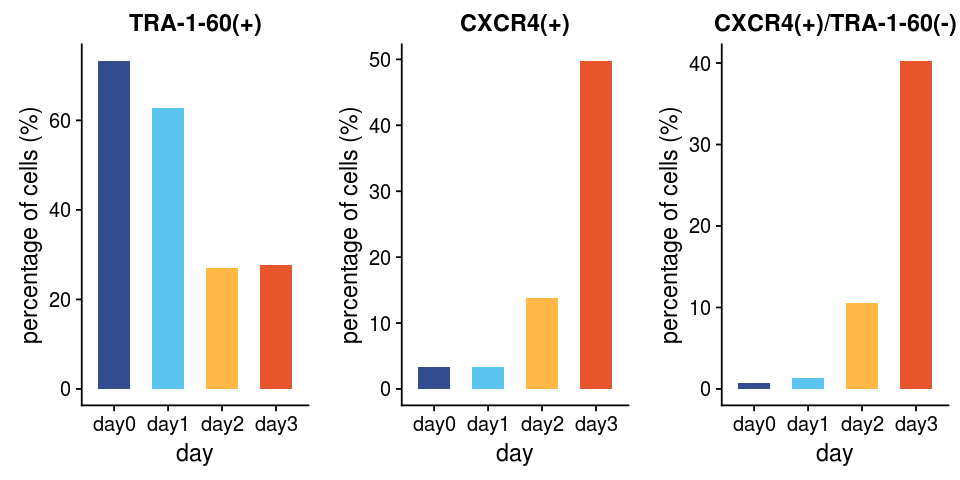

In [9]:
options(repr.plot.width = 8, repr.plot.height = 4) 
df_facs = as.data.frame(cbind(sce$donor, sce$day, sce$experiment, 
                             colData(sce)$mean_cxcr4_norm_sorted, colData(sce)$mean_tra160_norm_sorted))
# head(df_facs)
colnames(df_facs) = c("donor", "day", "expt", "CXCR4", "Tra160")
dim(df_facs)
df_facs = df_facs[!(is.na(df_facs$CXCR4) & is.na(df_facs$Tra160)),]
dim(df_facs)
df_facs$tra160.pos <- 0
df_facs$tra160.pos[df_facs$Tra160 > 0] <- 1
df_facs$tra160.neg <- 0
df_facs$tra160.neg[df_facs$Tra160 < 0] <- 1
df_facs$cxcr4.pos <- 0
df_facs$cxcr4.pos[df_facs$CXCR4 > 0] <- 1
df_byday <- df_facs %>% group_by(day) %>% summarize(pos.cxcr4 = sum(as.numeric(cxcr4.pos)),
                                                    pos.tra160 = sum(as.numeric(tra160.pos)),
                                                    pos.cxcr4.tra160.neg = sum(as.numeric(cxcr4.pos) & as.numeric(tra160.neg)),
                                                   tot.cells = length(as.numeric(cxcr4.pos[!(is.na(cxcr4.pos))])))

df_byday <- as.data.frame(df_byday)
df_byday$pct.tra160.pos <- df_byday$pos.tra160/df_byday$tot.cells*100
df_byday$pct.cxcr4.pos <- df_byday$pos.cxcr4/df_byday$tot.cells*100
df_byday$pct.cxcr4.pos.tra160.neg <- df_byday$pos.cxcr4.tra160.neg/df_byday$tot.cells*100

col_day0 = "#344d90"
col_day1 = "#5cc5ef"
col_day2 = "#ffb745"
col_day3 = "#e7552c"

# p1 = ggplot(df_byday[df_byday$day %in% c("day0","day3"),], 
p1 = ggplot(df_byday, 
            aes(x = as.factor(day), y = as.numeric(pct.tra160.pos))) + 
#         geom_bar(stat = "identity", col = c(col_day0, col_day3), fill = c(col_day0, col_day3), width = 0.4) +
        geom_bar(stat = "identity", fill = c(col_day0, col_day1, col_day2, col_day3), width = 0.6) +
        ggtitle("TRA-1-60(+)") + # ylim(c(1,2.5)) +
       scale_color_canva(palette = "Pool party") + 
        xlab("day") + ylab("percentage of cells (%)") + labs(colour = "day") 

# p2 = ggplot(df_byday[df_byday$day %in% c("day0","day3"),],
p2 = ggplot(df_byday,
            aes(x = as.factor(day), y = as.numeric(pct.cxcr4.pos))) + 
#         geom_bar(stat = "identity", col = c(col_day0, col_day3), fill = c(col_day0, col_day3), width = 0.4) +
        geom_bar(stat = "identity", fill = c(col_day0, col_day1, col_day2, col_day3), width = 0.6) +
        ggtitle("CXCR4(+)") + # ylim(c(1,2)) +
        scale_fill_canva(palette = "Pool party") + 
        xlab("day") + ylab("percentage of cells (%)") + labs(colour = "day")

# p3 = ggplot(df_byday[df_byday$day %in% c("day0","day3"),],
p3 = ggplot(df_byday,
            aes(x = as.factor(day), y = as.numeric(pct.cxcr4.pos.tra160.neg))) + 
#         geom_bar(stat = "identity", col = c(col_day0, col_day3), fill = c(col_day0, col_day3), width = 0.4) +
        geom_bar(stat = "identity", fill = c(col_day0, col_day1, col_day2, col_day3), width = 0.6) +
        ggtitle("CXCR4(+)/TRA-1-60(-)") + # ylim(c(1,2)) +
        scale_fill_canva(palette = "Pool party") + 
        xlab("day") + ylab("percentage of cells (%)") + labs(colour = "day")


plot_grid(p1, p2, p3, ncol = 3)

In [10]:
head(df_byday)

day,pos.cxcr4,pos.tra160,pos.cxcr4.tra160.neg,tot.cells,pct.tra160.pos,pct.cxcr4.pos,pct.cxcr4.pos.tra160.neg
day0,286,6275,60,8560,73.30607,3.341121,0.7009346
day1,274,5207,110,8293,62.78789,3.303991,1.3264199
day2,1048,2057,803,7628,26.96644,13.738857,10.5270058
day3,3606,2002,2917,7243,27.64048,49.786000,40.2733674


In [11]:
head(df_facs)

,donor,day,expt,CXCR4,Tra160,tra160.pos,tra160.neg,cxcr4.pos
286,fafq,day3,expt_10,-0.0221036313168952,-0.564946399181896,0,1,0
287,fafq,day3,expt_10,-0.815776110930329,-0.969801481748757,0,1,0
288,wopl,day3,expt_10,0.5569409430522,-1.19566167693768,0,1,1
289,sebz,day3,expt_10,1.08098136020315,-1.21720465094398,0,1,1
290,hayt,day3,expt_10,0.211149564056329,-1.18607218911828,0,1,1
291,fafq,day3,expt_10,-0.382820800640962,1.09195013465528,1,0,0


In [12]:
mean(df_facs[df_facs$day == "day0","tra160.pos"])
mean(df_facs[df_facs$day == "day3","cxcr4.pos"])

[1] 0.7330607

[1] 0.49786

In [13]:
df_byday_expt <- df_facs %>% group_by(day,expt) %>% summarize(pos.cxcr4 = sum(as.numeric(cxcr4.pos)),
                                                    pos.tra160 = sum(as.numeric(tra160.pos)),
                                                    pos.cxcr4.tra160.neg = sum(as.numeric(cxcr4.pos) & as.numeric(tra160.neg)),
                                                   tot.cells = length(as.numeric(cxcr4.pos[!(is.na(cxcr4.pos))])))

In [14]:
df_byday_expt$pct.pos.tra160 = df_byday_expt$pos.tra160/df_byday_expt$tot.cells
df_byday_expt$pct.pos.cxcr4 = df_byday_expt$pos.cxcr4/df_byday_expt$tot.cells
head(df_byday_expt)

day,expt,pos.cxcr4,pos.tra160,pos.cxcr4.tra160.neg,tot.cells,pct.pos.tra160,pct.pos.cxcr4
day0,expt_12,2,194,0,268,0.7238806,0.007462687
day0,expt_18,2,224,1,255,0.8784314,0.007843137
day0,expt_20,0,18,0,36,0.5000000,0.000000000
day0,expt_22,0,151,0,211,0.7156398,0.000000000
day0,expt_23,1,292,0,311,0.9389068,0.003215434
day0,expt_24,3,156,0,164,0.9512195,0.018292683


In [15]:
min(df_byday_expt[df_byday_expt$day == "day0","pct.pos.tra160"], na.rm = T)
max(df_byday_expt[df_byday_expt$day == "day0","pct.pos.tra160"], na.rm = T)

[1] 0.3478261

[1] 0.9598214

In [16]:
mean(unlist(df_byday_expt[df_byday_expt$day == "day0","pct.pos.tra160"]))
median(unlist(df_byday_expt[df_byday_expt$day == "day0","pct.pos.tra160"]))

[1] 0.71873

[1] 0.7197602

In [17]:
min(df_byday_expt[df_byday_expt$day == "day3","pct.pos.cxcr4"], na.rm = T)
max(df_byday_expt[df_byday_expt$day == "day3","pct.pos.cxcr4"], na.rm = T)

[1] 0

[1] 0.8846154

In [18]:
mean(unlist(df_byday_expt[df_byday_expt$day == "day3","pct.pos.cxcr4"]))
median(unlist(df_byday_expt[df_byday_expt$day == "day3","pct.pos.cxcr4"]))

[1] 0.4891646

[1] 0.4952656

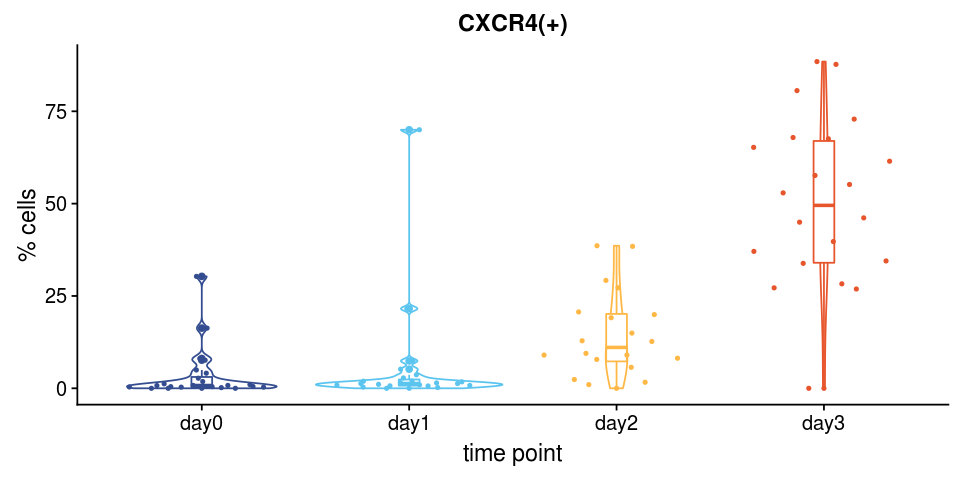

In [19]:
p = ggplot(as.data.frame(df_byday_expt), aes(x = day, y = pct.pos.cxcr4*100, colour = day)) 
p = p + xlab("time point") + ylab("% cells") + ggtitle("CXCR4(+)")
p = p + scale_color_canva(palette = "Pool party")
p = p + geom_violin()
p = p + geom_boxplot(width = 0.1)
p = p + geom_quasirandom(size = 0.8) 
p + theme(legend.position = "none")

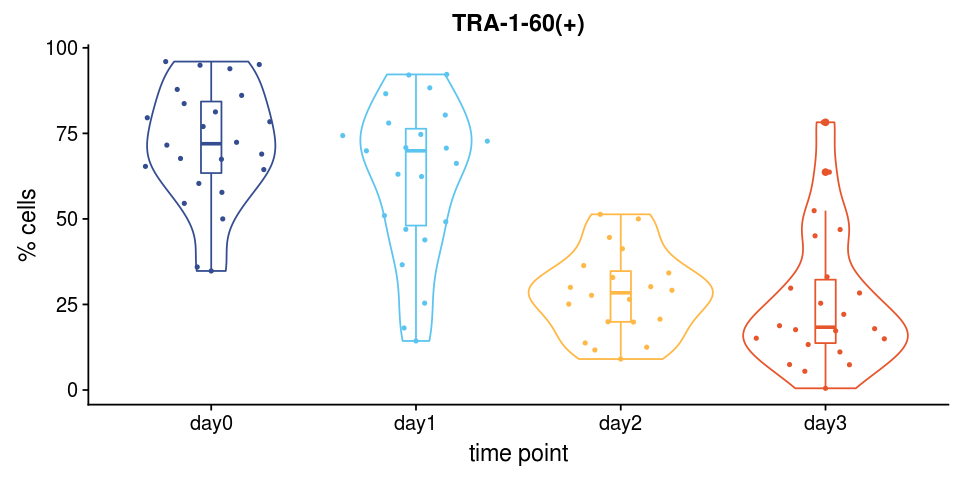

In [20]:
p = ggplot(as.data.frame(df_byday_expt), aes(x = day, y = pct.pos.tra160*100, colour = day)) 
p = p + xlab("time point") + ylab("% cells") + ggtitle("TRA-1-60(+)")
p = p + scale_color_canva(palette = "Pool party")
p = p + geom_violin()
p = p + geom_boxplot(width = 0.1)
p = p + geom_quasirandom(size = 0.8) 
p + theme(legend.position = "none")

In [19]:
##### Stats

In [20]:
unique(rowSums(table(sce$experiment, sce$donor)>0))

[1] 6 5 4

In [21]:
# donors in more than one experiment
length(colSums(table(sce$experiment, sce$donor)>0)[colSums(table(sce$experiment, sce$donor)>0)>1])

[1] 33

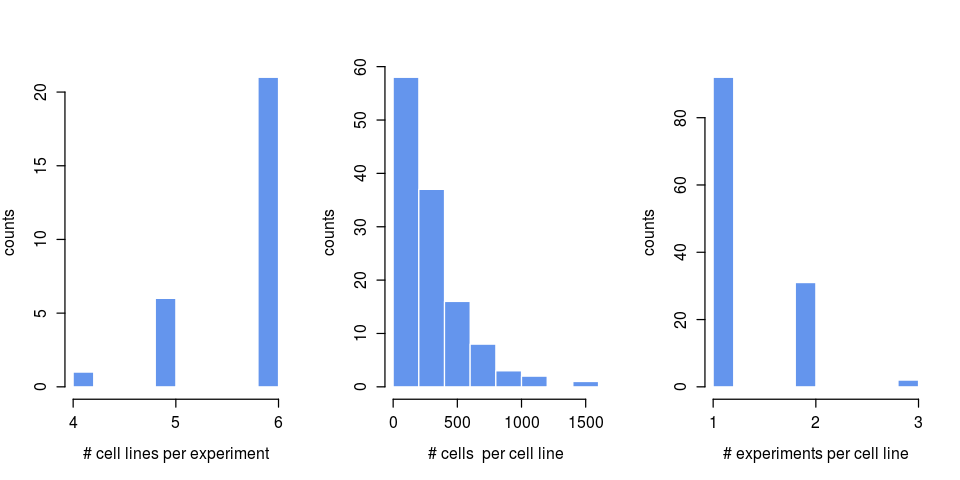

In [48]:
par(mfrow = c(1,3))
options(repr.plot.width = 8, repr.plot.height = 4) 
col = "cornflowerblue"
col2 = "white"
hist(rowSums(table(sce$experiment, sce$donor)>0), breaks = 8, ylab = "counts", cex.lab = 1.2,
     xlab = "# cell lines per experiment", main = "", col = col, border = col2, cex.axis = 1.2, xaxt = 'n')
axis(side = 1, at = c(4,5,6), cex.axis = 1.2)
# hist(log10(table(sce$donor)), main = "Number of cells \n per line (log10)", xlab = "", col = col, border = col2)
hist(table(sce$donor), xlab = "# cells  per cell line", main = "", col = col, border = col2, ylab = "counts", 
     cex.lab = 1.2, cex.axis = 1.2)
hist(colSums(table(sce$experiment, sce$donor)>0), ylab = "counts", cex = 1.5,
     xlab = "# experiments per cell line", main = "", col = col, border = col2, xaxt = 'n', cex.lab = 1.2, cex.axis = 1.2)
axis(side = 1, at = c(1,2,3), cex.axis = 1.2)

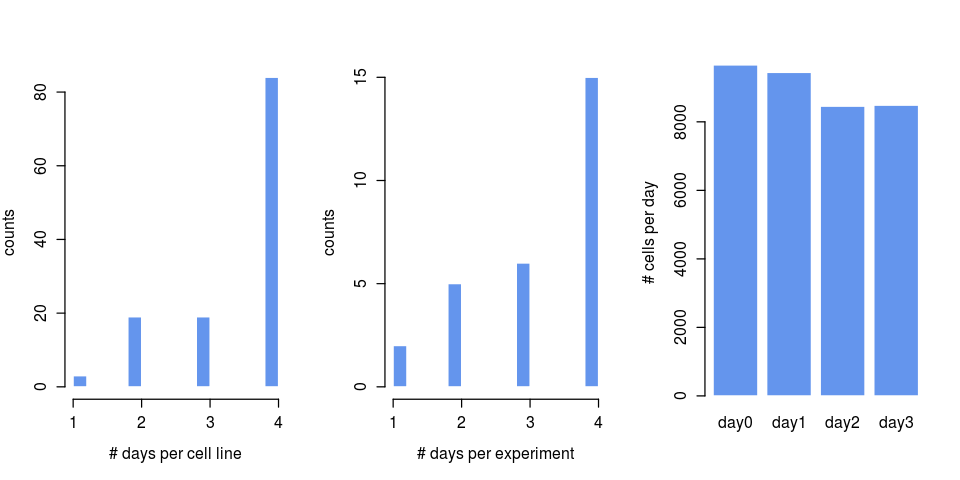

In [55]:
par(mfrow=c(1,3))
options(repr.plot.width = 8, repr.plot.height = 4) 
col = "cornflowerblue"
col2 = "white"
hist(rowSums(table(sce$donor, sce$day)>0), breaks = 15, ylab = "counts", cex.lab = 1.2, cex.axis = 1.2,
     xlab = "# days per cell line", main = "", col = col, border = col2, xaxt = 'n')
axis(side = 1, at = c(1,2,3,4), cex.axis = 1.2)
hist(rowSums(table(sce$experiment, sce$day)>0), xlab = "# days per experiment",  ylab = "counts",
     main = "", col = col, border = col2, breaks = 20, xaxt = 'n', cex.lab = 1.2, cex.axis = 1.2)
axis(side = 1, at = c(1,2,3,4), cex.axis = 1.2)
barplot(table(sce$day), 
     ylab = "# cells per day", main = "", col = col, border = col2, cex.lab = 1.2, cex.axis = 1.2, cex = 1.2)